# Exploratory Analysis into Variables Affecting Wheat Yields - by Paul Artunduaga

The purpose of this data is to collect data on wheat yields across time and around the world and any data on variables which may bear some correlation. 

My initial hypothesis is that technological and economic advancements are important factors in improving wheat yields.

This notebook will also consider the impact of historical events such as major wars and financial crises and how these impacted yields. 

Finally the notebook will perform standar pearson correlation calculations between yields and collected variables to develop a better understanding of what drives and undermines improvements in yield. 

In [53]:
import pandas as pd
import requests
from urllib.request import Request, urlopen
from urllib.request import urlopen
import io
import plotly.express as px

#import relevant libraries

## Data Provenance 

Wheat yields from 1961 onwards are as reported by the UN Food and Agricultural Organization (FAO) from its FAOstat database. Available online: http://www.fao.org/faostat/en/#data/QC.

Data from prior to 1961 is sourced from Bayliss-Smith & Wanmali (1984). Understanding Green Revolutions: Agrarian Change and Development Planning in South Asia. Available at: https://www-cambridge-org.ezproxy.is.ed.ac.uk/core/books/understanding-green-revolutions/761959C5635C85DB4C36E6B44C19A5EF.

In [2]:
world_wheat_yields = pd.read_csv(r'Desktop/long-term-wheat-yields-in-europe.csv')

#importing wheat yield data

I choose an approach that would make it easiest to quickly select data for a particular country. My approach to formatting data was as follows:
 1. Perform a groupby on country/entity
 2. Create a dictionary of tables with each table representing a country. 
 3. The key for each table would be the name of the country 
 
This meant that I could easily select data for a given country simply with:

name_of_dictionary ['country']

In [3]:
world_wheat_yields = world_wheat_yields.rename(columns={"Unnamed: 3": "Wheat Yield - Tonne/Hectare"})

#renaming column to more useful column header

In [4]:
country_keys = list(world_wheat_yields.Entity.unique())

#here I am creating the column keys - I want this to be the list of countries - therefore I am finding all the unique
#values in the entity/country column

In [5]:
countries_frames = [ frame for season, frame in world_wheat_yields.groupby('Entity') ]

#here I am performing a groupby on the entity (country) column. These are then stored in a list of dataframes

In [6]:
for i, df in enumerate(countries_frames):
    countries_frames[i] = countries_frames[i].set_index('Year')
    countries_frames[i] = countries_frames[i].drop(['Code'], axis=1)

#here for every item in the list, in other words each table representing a separate countries, I am dropping unneeded
#columns and resetting the index 

In [7]:
dictionary_yield = dict(zip(country_keys, countries_frames))

#here I am creating a dictionary with the names of countries as keys and the dataframes created from the groupby as
#the values

In [8]:
dictionary_yield["United States"].plot()

#successful creation of dictionary - can easily selected table per country and plot data onto a graph.

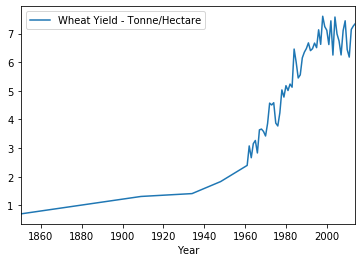

In [9]:
dictionary_yield["France"].plot()

#visualising France's yields

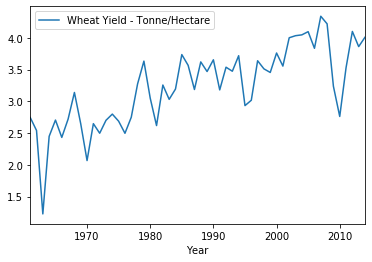

In [10]:
dictionary_yield["Japan"].plot()

#visualising Japan's yields

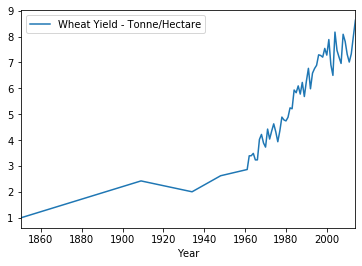

In [11]:
dictionary_yield["Germany"].plot()

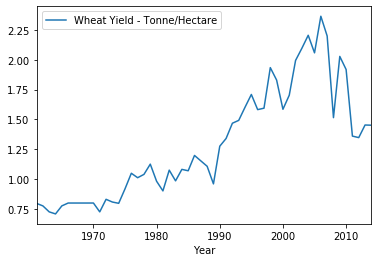

In [12]:
dictionary_yield["Iran"].plot()

### Real GDP/Capita/Country (USD)

In [13]:
GDP_per_capita = pd.read_csv(r'Desktop/real-gdp-per-capita-PennWT.csv')
GDP_per_capita = GDP_per_capita.rename(columns={'Output-side real GDP per capita (2011 international-$)': "GDP/Capita_USD"})
GDP_capita_keys = list(GDP_per_capita.Entity.unique())
GDP_capita_frames = [ frame for season, frame in GDP_per_capita.groupby('Entity') ]
for i, df in enumerate(GDP_capita_frames):
    GDP_capita_frames[i] = GDP_capita_frames[i].set_index('Year')
    GDP_capita_frames[i] = GDP_capita_frames[i].drop(['Code'], axis=1)
dictionary_GDP_capita = dict(zip(GDP_capita_keys, GDP_capita_frames))



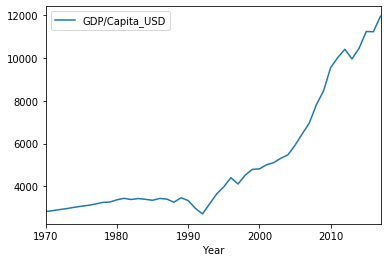

In [14]:
dictionary_GDP_capita["Albania"].plot()

### Gross GDP/Country (USD)

In [15]:
GDP_per_country = pd.read_csv(r'Desktop/gross-domestic-product.csv')
GDP_per_country = GDP_per_country.rename(columns={'GDP (constant 2010 US$) (constant 2010 US$)': "GDP_USD"})
GDP_keys = list(GDP_per_country.Entity.unique())
GDP_frames = [ frame for season, frame in GDP_per_country.groupby('Entity') ]
for i, df in enumerate(GDP_frames):
    GDP_frames[i] = GDP_frames[i].set_index('Year')
    GDP_frames[i] = GDP_frames[i].drop(['Code'], axis=1)
dictionary_GDP = dict(zip(GDP_keys, GDP_frames))

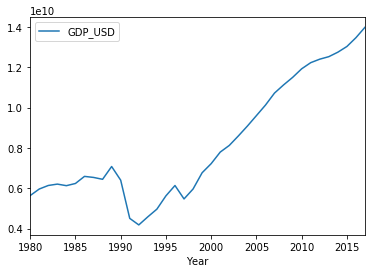

In [16]:
dictionary_GDP["Albania"].plot()

### Fertiliser Rates - Kg/Hectare

In [17]:
fertiliser_rates = pd.read_csv(r'Desktop/fertilizer-application-rates-over-the-long-run.csv')
fertiliser_rates = fertiliser_rates.rename(
    columns={'Fertilizer consumption (FAO (2017) & Federico (2008)) (kilograms per hectare)': "Fertiliser kg/hectare"})
fertliser_keys = list(fertiliser_rates.Entity.unique())
fertiliser_frames = [ frame for season, frame in fertiliser_rates.groupby('Entity') ]
for i, df in enumerate(fertiliser_frames):
    fertiliser_frames[i] = fertiliser_frames[i].set_index('Year')
    fertiliser_frames[i] = fertiliser_frames[i].drop(['Code'], axis=1)
dictionary_fertiliser = dict(zip(fertliser_keys, fertiliser_frames))

#same steps

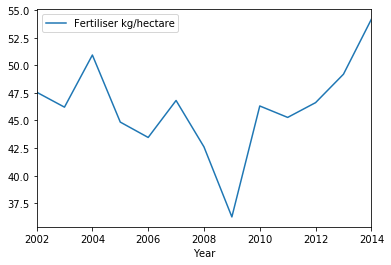

In [18]:
dictionary_fertiliser["Australia"].plot()

#visualising Australia's historic fertiliser use

### Public Education Expenditure As Share of GDP (%)

In [19]:
public_education_expenditure = pd.read_csv(r'Desktop/public-education-expenditure-as-share-of-gdp.csv')
public_education_expenditure = public_education_expenditure.rename(
    columns={'Public Expenditure on Education (percent of GDP)': "Percent of GDP"})
education_keys = list(public_education_expenditure.Entity.unique())
education_frames = [ frame for season, frame in public_education_expenditure.groupby('Entity') ]
for i, df in enumerate(education_frames):
    education_frames[i] = education_frames[i].set_index('Year')
    education_frames[i] = education_frames[i].drop(['Code'], axis=1)
public_education_expenditure_dictionary = dict(zip(education_keys, education_frames))

#same steps

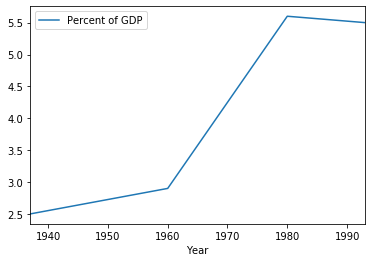

In [20]:
public_education_expenditure_dictionary['Austria'].plot()

#visualising Austria's historic public education expenditure as share of GDP

### Fixed Telephone Subscriptions/100 People

In [21]:
fixed_telephone_per_100 = pd.read_csv(r'Desktop/fixed-telephone-subscriptions-per-100-people.csv')
fixed_telephone_per_100 = fixed_telephone_per_100.rename(
    columns={'Fixed telephone subscriptions (per 100 people) (per 100 people)': "Fixed Telephone/100"})
fixed_keys = list(fixed_telephone_per_100.Entity.unique())
fixed_frames = [ frame for season, frame in fixed_telephone_per_100.groupby('Entity') ]
for i, df in enumerate(fixed_frames):
    fixed_frames[i] = fixed_frames[i].set_index('Year')
    fixed_frames[i] = fixed_frames[i].drop(['Code'], axis=1)
fixed_telephone_dictionary = dict(zip(fixed_keys, fixed_frames))

#same steps

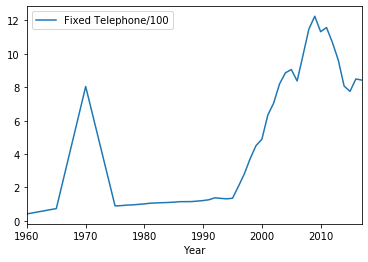

In [22]:
fixed_telephone_dictionary["Albania"].plot()

#visualising number of fixed telephone subscriptions per 100 in Albania

### Internet use in Population (%)

In [23]:
share_using_internet = pd.read_csv(r'Desktop/share-of-individuals-using-the-internet.csv')
share_using_internet = share_using_internet.rename(
    columns={'Individuals using the Internet (% of population) (% of population)': "Percentage Internet Use"})
internet_keys = list(share_using_internet.Entity.unique())
internet_frames = [ frame for season, frame in share_using_internet.groupby('Entity') ]
for i, df in enumerate(internet_frames):
    internet_frames[i] = internet_frames[i].set_index('Year')
    internet_frames[i] = internet_frames[i].drop(['Code'], axis=1)
internet_dictionary = dict(zip(internet_keys, internet_frames))

#same steps 

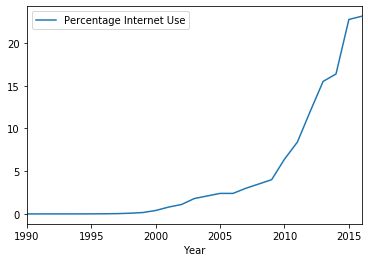

In [24]:
internet_dictionary["Zimbabwe"].plot()

#visualising internet use in Zimbabwe 

# Requests from World Bank API 

All the data in this notebook has been downloaded onto my local machine from the web to then be re-uploaded onto this notebook. The end-state for any data analysis should include data dynamically pulled straight from the web and reproducible by anyone by simply running the script. 

First time trying an API request...

In [25]:
response=requests.get("http://climatedataapi.worldbank.org/climateweb/rest/v1/country/annualavg/pr/1920/1939/USA.csv")

#requesting data from World Bank API - I have configured the request to pull annual average precipitation
#data from 1920-1939 in the USA

In [26]:
f = response.text

#store text part of the response (data)

listah = f.split(",")

#split string response on every comma into a list of strings

In [27]:
listah = listah[8:]

#trim string to required length 

In [28]:
listah = listah[0::4]

#selecting only every 4th object in the list - containing the data I need

In [29]:
Annual_Precipitation = []
for i in listah:
    i = i[0:17]
    Annual_Precipitation.append(i)
    
#the precipitation data comes with a set of randome characters at the end of the numerical data I need - here I am
#trimming these characters away to leaave only numerical data

In [30]:
Annual_Precipitation

#List of average annual precipitation in USE for 1920-139 - HOWEVER, there are only 15 data points here.
#I have tried to resolve this issue but have come unstuck for the time being - to be continued. 

['790.6361028238144',
 '739.3362184367556',
 '939.7243516499025',
 '779.0404023054358',
 '898.1444407247458',
 '847.0485774775588',
 '845.4780955327558',
 '825.6505057699028',
 '897.1020362453344',
 '815.9899280956733',
 '815.7217424350092',
 '932.4105818597735',
 '728.5749928767182',
 '839.9996105395489',
 '841.7922922262945']

# Pulling Static Data from World Bank

https://climateknowledgeportal.worldbank.org/download-data

After running into issues making requests from the World Bank API - I saved data from the World Bank website on my local computer to then upload onto the notebook. 

### Temperature Data

In [31]:
temps_1901_1930 = pd.read_csv(r"Desktop/temps-1901-1930.csv", usecols = [0,1,2,3])
temps_1931_1960 = pd.read_csv(r"Desktop/temps-1931-1960.csv", usecols = [0,1,2,3])
temps_1961_1990 = pd.read_csv(r"Desktop/temps-1961-1990.csv", usecols = [0,1,2,3])
temps_1991_2016 = pd.read_csv(r"Desktop/temps-1991-2016.csv", usecols = [0,1,2,3])
average_annual_temps = pd.concat([temps_1901_1930,temps_1931_1960,temps_1961_1990,temps_1991_2016])

#importing data had to be done in chunks of 29 years

In [32]:
average_annual_temps

#table showing average monthly temps across the world since 1901

,Temperature - (Celsius),Year,Statistics,Country
0,-0.03780,1901,Jan Average,Afghanistan
1,2.42348,1901,Feb Average,Afghanistan
2,9.36230,1901,Mar Average,Afghanistan
3,13.55640,1901,Apr Average,Afghanistan
4,18.15090,1901,May Average,Afghanistan
...,...,...,...,...
61147,18.75550,2016,Aug Average,Zimbabwe
61148,22.99190,2016,Sep Average,Zimbabwe
61149,25.86640,2016,Oct Average,Zimbabwe
61150,25.85150,2016,Nov Average,Zimbabwe


In [33]:
average_annual_temps.columns = average_annual_temps.columns.str.replace(' ', '')

#cleaning up the strings in the column headers - removing whitespace

In [34]:
average_annual_temps.Country = average_annual_temps.Country.str.replace(' ', '')

#cleaning up the strings in the columns themselves - removing whitespace

average_annual_temps = average_annual_temps.rename(
    columns={'Country': "Entity"})

#renaming the Country column to entity - this is because entity label is used in the other tables

In [35]:
average_annual_temps_keys = list(average_annual_temps.Entity.unique())
average_annual_temps_frames = []
for i in average_annual_temps_keys:
    item = average_annual_temps.loc[average_annual_temps['Entity'] == i].groupby("Year").mean()
    average_annual_temps_frames.append(item)

average_annual_temps_dictionary = dict(zip(average_annual_temps_keys, average_annual_temps_frames))

#same steps as before - creating a dictionary of dataframes to facilitate visualising tables and graphs per country

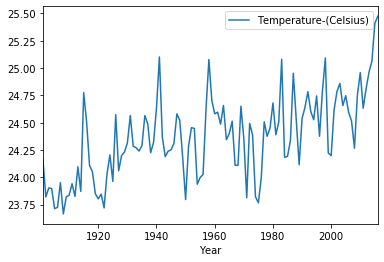

In [36]:
average_annual_temps_dictionary["Colombia"].plot()

#visualising Colombia's temperature over time

### Precipitation Data

In [37]:
rainfall_1901_1930 = pd.read_csv(r"Desktop/rainfall-1901-1930.csv", usecols = [0,1,2,3])
rainfall_1931_1960 = pd.read_csv(r"Desktop/rainfall-1931-1960.csv", usecols = [0,1,2,3])
rainfall_1961_1990 = pd.read_csv(r"Desktop/rainfall-1961-1990.csv", usecols = [0,1,2,3])
rainfall_1991_2016 = pd.read_csv(r"Desktop/rainfall-1991-2016.csv", usecols = [0,1,2,3])
average_annual_rainfall = pd.concat([rainfall_1901_1930,rainfall_1931_1960,rainfall_1961_1990,rainfall_1991_2016])

#importing data had to be done in chunks of 29 years - the steps below are the same as the above code 

In [38]:
average_annual_rainfall

,Rainfall - (MM),Year,Statistics,Country
0,55.74480,1901,Jan Average,Afghanistan
1,13.94800,1901,Feb Average,Afghanistan
2,43.84640,1901,Mar Average,Afghanistan
3,26.96100,1901,Apr Average,Afghanistan
4,52.95790,1901,May Average,Afghanistan
...,...,...,...,...
61147,2.03926,2016,Aug Average,Zimbabwe
61148,0.48070,2016,Sep Average,Zimbabwe
61149,9.13410,2016,Oct Average,Zimbabwe
61150,72.95080,2016,Nov Average,Zimbabwe


In [39]:
average_annual_rainfall.columns = average_annual_rainfall.columns.str.replace(' ', '')

In [40]:
average_annual_rainfall.Country = average_annual_rainfall.Country.str.replace(' ', '')
average_annual_rainfall = average_annual_rainfall.rename(
    columns={'Country': "Entity"})

In [41]:
average_annual_rainfall_keys = list(average_annual_rainfall.Entity.unique())
average_annual_rainfall_frames = []
for i in average_annual_rainfall_keys:
    item = average_annual_rainfall.loc[average_annual_rainfall['Entity'] == i].groupby("Year").mean()
    average_annual_rainfall_frames.append(item)

average_annual_rainfall_dictionary = dict(zip(average_annual_rainfall_keys, average_annual_rainfall_frames))

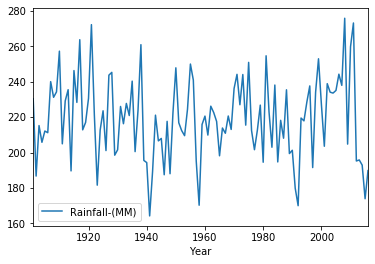

In [42]:
average_annual_rainfall_dictionary["Colombia"].plot()

## Historical Events

In the following cells I have selected a few countries for closer examination. My hypothesis is that wheat yields may be affected by major events throughout time - political, technological, economic. Thus for each selected country I have added a few markers indicating major events to see if these appear to have any impact. 

NOTE: Norin-10 is a highly resistant wheat variety developed in Japans that is widely credit for increased wheat yields particularly in developping countries. It was fundamental to the success of the Green Revolution - a initiative that greatly benefitted both India and Mexico, amongst others, which promoted sharing of agricultural knowledge and technology for the benefit of all. 

## France

Text(0.5, 1.0, "France's Wheat Yield Tonne/Hectare")

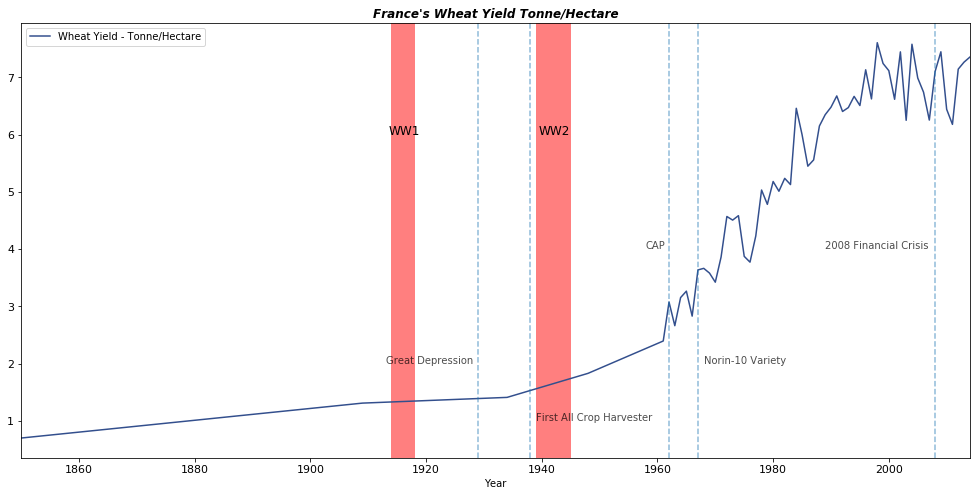

In [43]:
ax = dictionary_yield["France"].plot(color='#334f8d', figsize=(17,8), fontsize=11, zorder=2)

ww1 = 1914
WW1 = 1918

ww2 = 1939
WW2 = 1945

norin = 1967
norin1 = 1968

great_depression = 1929
great_depression1 = 1913

financial_crash_2008 = 2008
financial_crash_2008_1 = 1989

combine_harvester = 1938
combine_harvester1 = 1939

CAP = 1962 
CAP1 = 1958



ax.axvspan(ww1, WW1, color='r', alpha=0.5, lw=0)
ax.text(x=1913.5, y=6, s='WW1', alpha=1, color='#000000', size='large')

ax.axvspan(ww2, WW2, color='r', alpha=0.5, lw=0)
ax.text(x=1939.5, y=6, s='WW2', alpha=1, color='#000000', size='large')

ax.axvline(x=CAP, linestyle='dashed', alpha=0.5)
ax.text(x=CAP1, y=4, s='CAP', alpha=0.7, color='#000000')

ax.axvline(x=financial_crash_2008, linestyle='dashed', alpha=0.5)
ax.text(x=financial_crash_2008_1, y=4, s='2008 Financial Crisis', alpha=0.7, color='#000000')

ax.axvline(x=great_depression, linestyle='dashed', alpha=0.5)
ax.text(x=great_depression1, y=2, s='Great Depression', alpha=0.7, color='#000000')

ax.axvline(x=combine_harvester, linestyle='dashed', alpha=0.5)
ax.text(x=combine_harvester1, y=1, s='First All Crop Harvester', alpha=0.7, color='#000000')

ax.axvline(x=norin, linestyle='dashed', alpha=0.5)
ax.text(x=norin1, y=2, s='Norin-10 Variety', alpha=0.7, color='#000000')

ax.set_title("France's Wheat Yield Tonne/Hectare",style='oblique', weight='bold', loc='center')

## India

Text(0.5, 1.0, "India's Wheat Yield Tonne/Hectare")

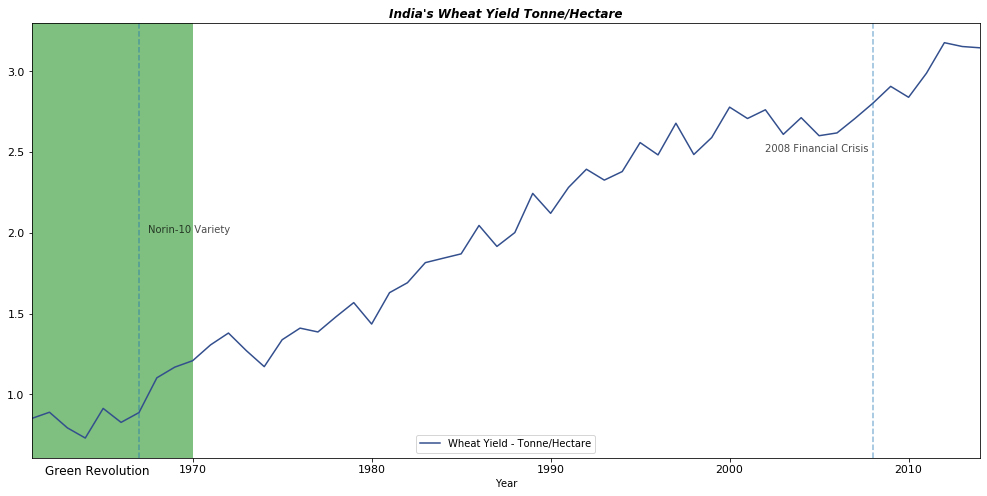

In [44]:
ax = dictionary_yield["India"].plot(color='#334f8d', figsize=(17,8), fontsize=11, zorder=2)

norin = 1967
norin1 = 1967.5
financial_crash_2008 = 2008
financial_crash_2008_1 = 2002

a = 1950
b = 1970

ax.axvspan(a, b, color='g', alpha=0.5, lw=0)
ax.text(x=1961.75, y=0.5, s='Green Revolution', alpha=1, color='#000000', size='large')

ax.axvline(x=financial_crash_2008, linestyle='dashed', alpha=0.5)
ax.text(x=financial_crash_2008_1, y=2.5, s='2008 Financial Crisis', alpha=0.7, color='#000000')

ax.axvline(x=norin, linestyle='dashed', alpha=0.5)
ax.text(x=norin1, y=2, s='Norin-10 Variety', alpha=0.7, color='#000000')

ax.set_title("India's Wheat Yield Tonne/Hectare",style='oblique', weight='bold', loc='center')

## Mexico

Text(0.5, 1.0, "Mexico's Wheat Yield Tonne/Hectare")

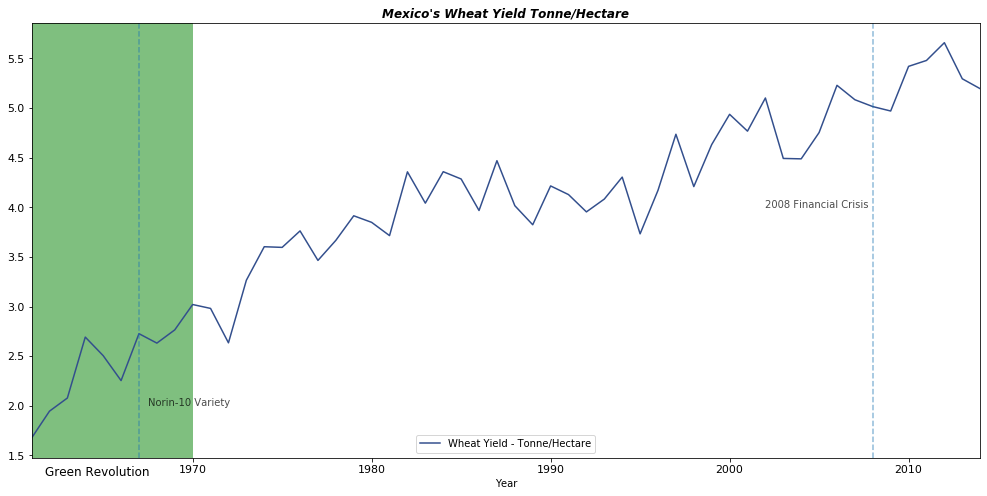

In [45]:
ax = dictionary_yield["Mexico"].plot(color='#334f8d', figsize=(17,8), fontsize=11, zorder=2)

norin = 1967
norin1 = 1967.5
financial_crash_2008 = 2008
financial_crash_2008_1 = 2002

a = 1950
b = 1970

ax.axvspan(a, b, color='g', alpha=0.5, lw=0)
ax.text(x=1961.75, y=1.3, s='Green Revolution', alpha=1, color='#000000', size='large')

ax.axvline(x=financial_crash_2008, linestyle='dashed', alpha=0.5)
ax.text(x=financial_crash_2008_1, y=4, s='2008 Financial Crisis', alpha=0.7, color='#000000')

ax.axvline(x=norin, linestyle='dashed', alpha=0.5)
ax.text(x=norin1, y=2, s='Norin-10 Variety', alpha=0.7, color='#000000')

ax.set_title("Mexico's Wheat Yield Tonne/Hectare",style='oblique', weight='bold', loc='center')

## Denmark

Text(0.5, 1.0, "Denmark's Wheat Yield Tonne/Hectare")

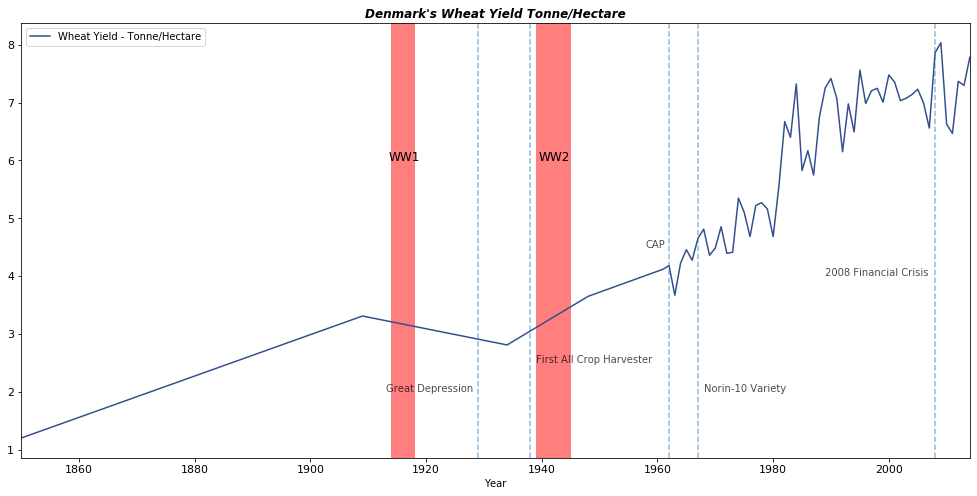

In [46]:
ax = dictionary_yield["Denmark"].plot(color='#334f8d', figsize=(17,8), fontsize=11, zorder=2)

norin = 1967
norin1 = 1968
great_depression = 1929
great_depression1 = 1913
financial_crash_2008 = 2008
financial_crash_2008_1 = 1989
combine_harvester = 1938
combine_harvester1 = 1939
CAP = 1962 
CAP1 = 1958
ww1 = 1914
WW1 = 1918
ww2 = 1939
WW2 = 1945


ax.axvspan(ww1, WW1, color='r', alpha=0.5, lw=0)
ax.text(x=1913.5, y=6, s='WW1', alpha=1, color='#000000', size='large')

ax.axvspan(ww2, WW2, color='r', alpha=0.5, lw=0)
ax.text(x=1939.5, y=6, s='WW2', alpha=1, color='#000000', size='large')

ax.axvline(x=CAP, linestyle='dashed', alpha=0.5)
ax.text(x=CAP1, y=4.5, s='CAP', alpha=0.7, color='#000000')

ax.axvline(x=financial_crash_2008, linestyle='dashed', alpha=0.5)
ax.text(x=financial_crash_2008_1, y=4, s='2008 Financial Crisis', alpha=0.7, color='#000000')

ax.axvline(x=great_depression, linestyle='dashed', alpha=0.5)
ax.text(x=great_depression1, y=2, s='Great Depression', alpha=0.7, color='#000000')

ax.axvline(x=combine_harvester, linestyle='dashed', alpha=0.5)
ax.text(x=combine_harvester1, y=2.5, s='First All Crop Harvester', alpha=0.7, color='#000000')

ax.axvline(x=norin, linestyle='dashed', alpha=0.5)
ax.text(x=norin1, y=2, s='Norin-10 Variety', alpha=0.7, color='#000000')


ax.set_title("Denmark's Wheat Yield Tonne/Hectare",style='oblique', weight='bold', loc='center')

## United States of America

Text(0.5, 1.0, "USA's Wheat Yield Tonne/Hectare")

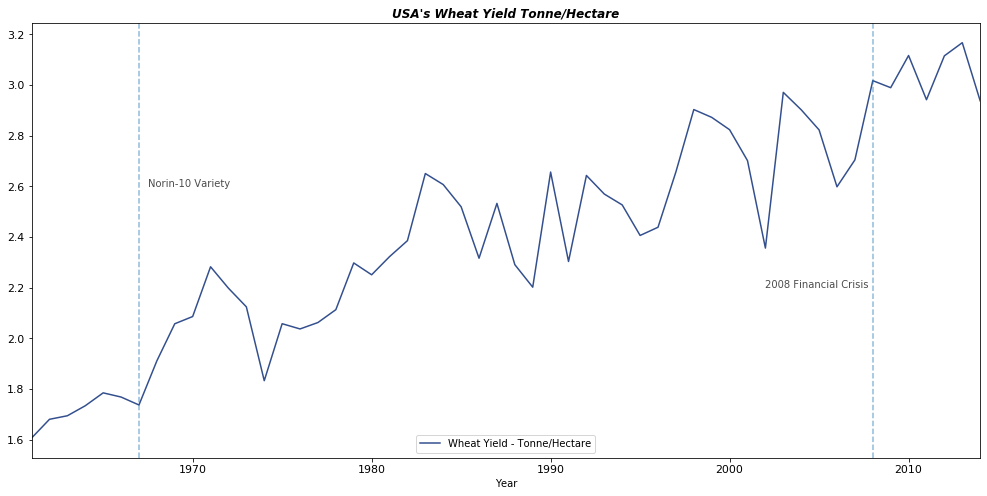

In [47]:
ax = dictionary_yield["United States"].plot(color='#334f8d', figsize=(17,8), fontsize=11, zorder=2)

norin = 1967
norin1 = 1967.5
financial_crash_2008 = 2008
financial_crash_2008_1 = 2002

ax.axvline(x=financial_crash_2008, linestyle='dashed', alpha=0.5)
ax.text(x=financial_crash_2008_1, y=2.2, s='2008 Financial Crisis', alpha=0.7, color='#000000')

ax.axvline(x=norin, linestyle='dashed', alpha=0.5)
ax.text(x=norin1, y=2.6, s='Norin-10 Variety', alpha=0.7, color='#000000')


ax.set_title("USA's Wheat Yield Tonne/Hectare",style='oblique', weight='bold', loc='center')

## Observations 

Overview: I would say that economic events are suggested to have been of far lesser importance than technological/political events. 

Financial Crises: On a first view, The Great Depression and the 2007/2008 Crash do not seem to have had a major impact on wheat yields. However, their impact should not be ignored entirely as they're effects may be longer terms and may not be noticed immediately. For instance, they may have delayed technological development and adoption, although it is far harder to measure how far this may be the case. Worth keeping in mind. 

Green Revolution (GR): The issue with my data is that for countires impacted by the Green Revolution (Mexico + India), my timeline starts at the same time as the GR so it impossible to determine whether the general upwards trend in wheath yields from 1961-today is due to the GR. Reading up on the GR suggests that this was indeed the case - but I will need additional data to visualise this effectively and perusasively.


Norin-10: This would fall under both technological innovation and political factors. In the developping world, particularly those that were involved in the GR - this variety seems to have had a very significant impact on wheat yields. This is perhaps because of the harsher climates in countries such as India and Mexico (two of the biggest winners of the GR) stood to gain the most from the introduction of a hardier wheat variety. In countries with more temperate climates - such as in Europe, the uptick is less noticable. 

Common Agricultural Policy: Evidence suggests this to be an important political development that had significant on European yields in the same way the Green Revolution had across the developping world. In certain respects they are underpinned by collaboration and the sharing of best-practice and new technologies and varieties. France, Denmark and Germany's uptick in productivity conincide with the introduction of this policy - though this does not prove causality - it would be worth exploring further how far CAP impacted yields.


USA: The USA's wheat yields were somewhat surprising - far lower than European Countries and that of Mexico and India. This is also the case for Japan - a country with high technological adoption, high GDP, both Gross and per Capita - but low wheat yield. Specialisation in corn and rice production in the US and Japan respectively may have some part to play - however it is suprising, based on assumptions of the role of technology and GDP, that Japand and in particular the US, lag so far behind. (Japan's wheat yields are visualised near the top of the notebook)

## Exploring Correlations between Data Points

In [48]:
temperature = average_annual_temps.groupby(["Entity", "Year"]).mean()
temperature.reset_index(inplace=True)
rainfall = average_annual_rainfall.groupby(["Entity", "Year"]).mean()
rainfall.reset_index(inplace=True)

#formatting these two dataframes to enable a merge with the rest

In [49]:
merged = world_wheat_yields.merge(fixed_telephone_per_100[['Entity','Year','Fixed Telephone/100']], on=['Entity', 'Year'])
merged = merged.merge(share_using_internet[['Entity','Year','Percentage Internet Use']], on=['Entity', 'Year'])
merged = merged.merge(fertiliser_rates[['Entity','Year','Fertiliser kg/hectare']], on=['Entity', 'Year'])
merged = merged.merge(GDP_per_country[['Entity','Year','GDP_USD']], on=['Entity', 'Year'])
merged = merged.merge(GDP_per_capita[['Entity','Year','GDP/Capita_USD']], on=['Entity', 'Year'])
merged = merged.merge(rainfall[['Entity','Year','Rainfall-(MM)']], on=['Entity', 'Year'])
merged = merged.merge(temperature[['Entity','Year','Temperature-(Celsius)']], on=['Entity', 'Year'])
merged 

#here I am creating a DataFrame containing all the data except public expenditure on education. 
#(I omitted this dataset from the combined table because it only covered 16 countries)

,Entity,Code,Year,Wheat Yield - Tonne/Hectare,Fixed Telephone/100,Percentage Internet Use,Fertiliser kg/hectare,GDP_USD,GDP/Capita_USD,Rainfall-(MM),Temperature-(Celsius)
0,Albania,ALB,2002,3.1617,7.053477,0.390081,97.185121,8.125268e+09,5107.8398,87.401308,12.335653
1,Albania,ALB,2003,2.8629,8.196708,0.971900,98.932526,8.594380e+09,5311.2808,79.385017,12.138401
2,Albania,ALB,2004,3.1130,8.863119,2.420388,100.598616,9.085081e+09,5472.7114,86.850908,11.884031
3,Albania,ALB,2005,3.1582,9.059980,6.043891,111.596654,9.604822e+09,5920.5547,84.012383,11.405861
4,Albania,ALB,2006,3.0787,8.381541,9.609991,85.092466,1.012646e+10,6443.9307,81.724017,11.772879
...,...,...,...,...,...,...,...,...,...,...,...
1231,Zimbabwe,ZWE,2010,2.7823,2.690554,6.400000,34.083000,1.014186e+10,1479.0305,57.353223,22.419467
1232,Zimbabwe,ZWE,2011,2.6530,2.474516,8.400000,26.548333,1.170834e+10,1686.7614,63.126104,21.714008
1233,Zimbabwe,ZWE,2012,2.4705,2.050531,12.000000,20.809500,1.343879e+10,1797.5902,45.312368,21.910075
1234,Zimbabwe,ZWE,2013,2.3160,2.020405,15.500000,28.613250,1.418193e+10,1881.8159,51.234424,21.624350


In [50]:
correlations = merged.corr(method="pearson")

#computes correlation between two variables - in this instance we're interested in how wheat yields correlate to other
#variables I have collected data on

In [51]:
correlations[["Wheat Yield - Tonne/Hectare"]]

#correlations with all collected variables and wheat yield

,Wheat Yield - Tonne/Hectare
Year,0.047329
Wheat Yield - Tonne/Hectare,1.000000
Fixed Telephone/100,0.560889
Percentage Internet Use,0.548878
Fertiliser kg/hectare,0.045964
GDP_USD,0.263034
GDP/Capita_USD,0.447910
Rainfall-(MM),-0.102137
Temperature-(Celsius),-0.370200


## Observations

Fixed Telephone/100: This suggests that wheat yields are fairly sensitive to technological adoptment by a given country. The graphs demonstrating the uptick in yield following technological changes support this view. 

Percentage Internet Use: Similarly, this suggests again that the adoption of technology is more important than simply the introduction of technology.

GDP_USD: Gross GDP has a weak positive correlation with increases in Wheat Yield Per Hectare - this suggests that the overall wealth of a country is a not an important factor.

GDP/Capita_USD: GDP per capita has a much stronger positive correlation. This suggests that the capital available to individuals, rather than that of the economy as a whole, has a far bigger impact on wheat yields. However, the USA's low yields yet high GDP per capita suggests the contrary - this merits further exploration. My first thought would be to consider the extent of the USA's specialisation in the farming of corn, and the variance in wheat yields from state to state.

Fertiliser kg/hectare: Interestingly there is almost no correlation between fertiliser use and wheat yields. I would put forward the hypothesis that fertiliser use in countries with the highest yield has levelled out - I would assume there is a limit to how much fertiliser can be used, beyond which it becomes counter-productive. 

Secondly, I would hypothesise that certain countries may skew the overall picture. Those with highest yield have perhaps considered the negative impact of fertiliser and have therefore limited its use and/or utilise alternative methods of maintaining soil quality and fertility - such as through crop rotation. 


Temperature: I think this metric does not offer much insight because of the huge range in average temperatures between wheat producing countries - I think a better approach would be to collect data on how many hot or cold days (say above the 90th percentile) were recorded on a given year. It is possible abnormal weather has greatest impact on wheat yields. The World Bank holds data of this kind - the issue remains how to work the API - WIP!


Rainfall: Reiterating the arguments above - I think there is to much variance in rainfall between countries - rather it would be best to explore data which indacted abnormal rainfall or lack of. Ultimately I would like to explore the possibility that countries with the least abnormalities - with the most conistent weather - are able to achieve the highest wheat yields. 

### Further Exploration Ideas

In [52]:
#rainfall data
#temperature - note impact varies on country - in general increase in temp is good for colder countries and bad for hot
#light intensity
#c02 concentration
#land reform - average size of holding - corporate vs individual - economies of scale
#average age of farmer - more likely to implement tech
#level of farmer education
#level of unionisation and cooperatives - cooperation means sharing best practise
#extent of specialistion in wheat farming
#pesticides
#newseeds
#gdp data
#communism
#new technologies
#crop variety - ie higher quality will have lower yield 
#R and D investment from public and private sector
#extent of crop rotation and mono-culture 